# Anomaly Detection Examples with Time Series Data by Auto Regression Model

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P210-212 の例

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

### データの読み込みと確認

In [2]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/nottem.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
dtr = df.iloc[0:120, 1].to_numpy()
xi = df.iloc[120:,1].to_numpy()
tt = len(xi)

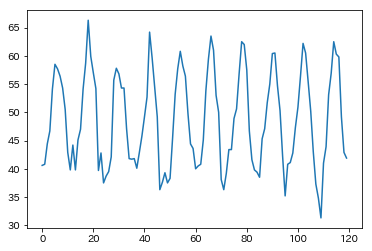

In [4]:
plt.plot(dtr)
plt.show()

### ARモデルの適用

In [5]:
ar_model = AR(dtr)
ar_result = ar_model.fit()

In [6]:
alpha = ar_result.params
r = ar_result.k_ar
t = ar_result.k_trend
t_order = ar_result.trendorder
xmean = dtr.mean()
sig2 = ar_result.sigma2

n = tt - r

In [7]:
def embed(lst, dim):
    emb = np.empty((0,dim), float)
    for i in range(lst.size - dim):
        rindex = np.arange(i+dim-1, i-1, -1)
        tmp = np.array(lst[rindex]).reshape((1,-1))
        emb = np.append( emb, tmp, axis=0)
    return emb

### 異常度の計算

In [8]:
x = embed(xi - xmean, r).T[0:n]

ypred = x.T.dot(alpha[1:r+1]) + xmean
y = xi[r:tt]

a = (y - ypred)**2/sig2

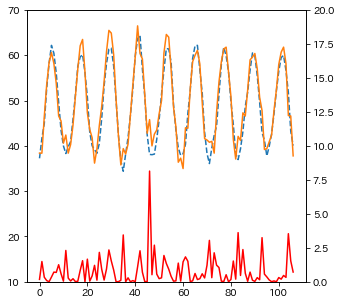

In [9]:
fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(ypred, '--')
ax1.plot(y)
ax1.set_ylim(10, 70)
ax2 = ax1.twinx()
ax2.plot(a, 'r')
ax2.set_ylim(0, 20)
plt.show()